# Epidemic modelling

### SIR model
An SIR model is a classic epidemic model that can be used to simulate the spread of diseases such as influenza. SIR stands for the three basic stages of an infection

+ S = Susceptible: an individual has not been infected and is susceptible to infection
+ I = Infected: an individual is infected and is capab;e of transmitting the pathogen to others that come into contact with them
+ R = Recovered: an individual has recovered from the infection. This means the individual is no longer transmitting the pathogen to others and is no longer at risk from being reinfected.

All individuals in a population can be classed as being in one of these stages. So the total population size is N = S + I + R. Individuals can move between these stages. A susceptible can become infected, and an infected can become recovered.


**The process of susceptibles becoming infected** is controlled by three quantities
1. The number of susceptible people in a population (=S)
2. The probability that a person is in contact with an infected person. Assuming that infected people are evenly mixed throughout the population (the mass action assumption) this probability is I/N
3. The probability that the infection is spread to a susceptible person that has been in contact with an infected person. The transmission coefficient (commonly represented as $\beta$) quantifies the probability.

These three quantities are combined to calculate the number of new infections per unit time

$$\text{Number of new infections per unit time} = \beta S \frac{I}{N}$$


**The process of infected people recovering** occurs with a fixed probability per unit time, $\sigma$. 

$$\text{Number of newly recovered individuals per unit time} = \sigma I$$



Puttng this together, the equations governing the dynamics of an epidemic can be written (in discrete time) as:

$$S_{t+1} = S_t - \beta \frac{I_t}{N} S_t$$
$$I_{t+1} = I_t + \beta \frac{I_t}{N} S_t - \sigma I_t$$
$$R_{t+1} = R_t + \sigma I_t$$

where $S_t$, $I_t$ and $R_t$ are the number of susceptible, infected and recovered individuals at time $t$.


---------

### La Gloria Swine Flu Epidemic

In spring 2009 a new strain of the influenza virus (called novel influenza A (H1N1), or more commonly known as Swine flu) emerged in Mexico, in the town of La Gloria (https://en.wikipedia.org/wiki/2009_swine_flu_pandemic). 

In 2009 the town was estimated to have a population of 1575 people, and the SIR model parameters were estimated to be beta=0.047 and sigma=0.034. 

The number of new infections each day was recorded by GP's the town of La Gloria. The data are in the file la_gloria.csv. Below the data are imported and the number of daily new infections plotted against time.

Text(0.5,1,'La Gloria Data')

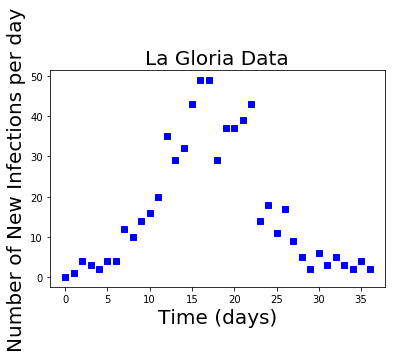

In [1]:
# Code to import data on the La Gloria Swine Flu
# epidemic of 2009 and plot the daily number of new
# swine flu cases in the town

%matplotlib inline
import matplotlib.pyplot as plt


import pandas as pd

# Import the La Gloria data
data = pd.read_csv("la_gloria.csv") 

# Plot the La Gloria epidemic
plt.figure(1)
plt.plot(data['Time'], data['NewCases'],  'sb')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number of New Infections per day', fontsize=20)
plt.title('La Gloria Data', fontsize=20)


Q1. Below is the skeleton of some python code to simulate an epidemic and plot the results. The code currently does not correspond to a typical SIR epidemic model, because it assumes that a **fixed proportion** of susceptibles becomes infected every hour (i.e. the chance of meeting an infected person does not affect the chance of becoming infected!). This fixed proportion is captured by the parameter beta (4.7% of susceptibles become infected each hour). 

Modify the code so that it simulates a classic SIR model. In this classic model, the number of new infections per hour should be 4.7% of the **number of susceptibles who come into contact with infected people**. You can assume that infected people are evenly mixed throughout the population of La Gloria (commonly called the mass action principle).

Text(0.5,1,'SIR model')

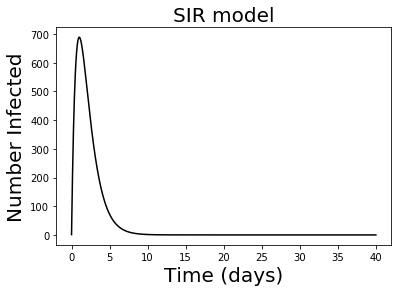

In [2]:
# Model an SIR epidemic

# These model parameters simulate the Swine Flu epidemic from 2009 in La Gloria

N = 1575.0     # Population size [individuals]
beta = 0.047   # Transmission coefficient [per hour]
sigma = 0.034  # Recovery rate [per hour]
tMax = 24*40   # Maximum time of simulation [hours]

# =========================================
# Set initial conditions
S = [N-1]      # Initial number of susceptibles
I = [1]        # Initial number of infected
R = [0]        # Initial number of recovered
time = [0]     # Initial time [hours]

for t in range(tMax):
    # Calculate the new values of S, I and R one hour
    # into the future
    Snew = S[t] - beta*S[t]
    Inew = I[t] + beta*S[t] - sigma * I[t]
    Rnew = R[t] + sigma * I[t]

    # Add these new values onto the list of values for S, I and R
    time.append((float(t)+1)/24.0)  # Time in days
    S.append(Snew)
    I.append(Inew)
    R.append(Rnew)
    
 
# Plot number of infected people results
plt.figure(1)
plt.plot(time, I,  '-k')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number Infected', fontsize=20)
plt.title('SIR model', fontsize=20)

----------
Below is the correct python code:

Text(0.5,1,'Corrected SIR model')

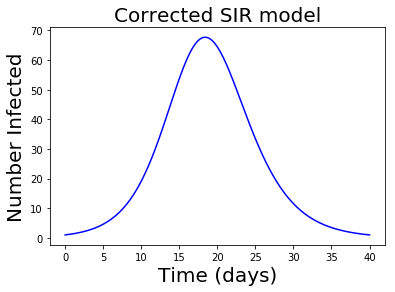

In [3]:
# Model an SIR epidemic

# These model parameters simulate the Swine Flu epidemic from 2009 in La Gloria

N = 1575.0     # Population size [individuals]
beta = 0.047   # Transmission coefficient [per hour]
sigma = 0.034  # Recovery rate [per hour]
tMax = 24*40   # Maximum time of simulation [hours]



# =========================================
# Set initial conditions
S = [N-1]        # Initial number of susceptibles
I = [1.0]        # Initial number of infected
R = [0.0]        # Initial number of recovered
time = [0.0]     # Initial time [hours]

for t in range(tMax):
    # Calculate the new values of S, I and R one hour
    # into the future
    Snew = S[t] - beta*S[t]*I[t]/N
    Inew = I[t] + beta*S[t]*I[t]/N - sigma * I[t]
    Rnew = R[t] + sigma * I[t]

    # Add these new values onto the list of values for S, I and R
    time.append((float(t)+1)/24.0)  # Time in days
    S.append(Snew)
    I.append(Inew)
    R.append(Rnew)


    
# Plot number of infected people results
plt.figure(2)
plt.plot(time, I,  '-b')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number Infected', fontsize=20)
plt.title('Corrected SIR model', fontsize=20)

----

Q2. The SIR model that you created in question 1 has the estimated parameters for the La Gloria epidemic ($\beta=0.047$, $\sigma=0.034$). The data from the real La Gloria epidemic can be compared to your simulations from question 1. However, there are two corrections which must be applied to the simulated data:
    
1. In reality, not everyone who became infected was recorded (some infected people don't go to the doctor). It is estimated that 85% of the people who were infected went to the doctor
    
2. The model calculates numbers of infected people **per hour**, whereas the data calculates numbers of **newly** infected people (new cases) **per day**


Edit the python code below to correctly calculate the simulated predictions for the number of new cases per day that went to see a doctor, so that it can be compared against the real data.

Text(0.5,1,'La Gloria Data & Model Prediction')

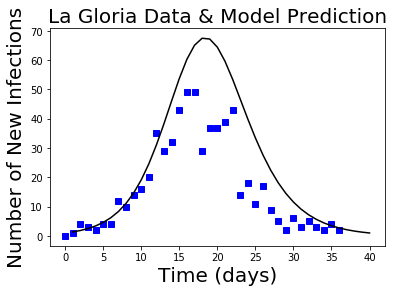

In [4]:
# Edit this code ------ Start ------

# Use the model results to predict the number of
# new cases over 1 day
model_NewCases = []
model_Time = []
for i in range(24,len(time),24):
    model_NewCases.append(I[i])
    model_Time.append(time[i])

# Edit this code ------ End ------



# Plot the La Gloria data and the model predictions
plt.figure(3)
plt.plot(data['Time'], data['NewCases'],  'sb')
plt.plot(model_Time, model_NewCases, '-k')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number of New Infections', fontsize=20)
plt.title('La Gloria Data & Model Prediction', fontsize=20)

-------
Correct code

Text(0.5,1,'La Gloria Data & Model Prediction')

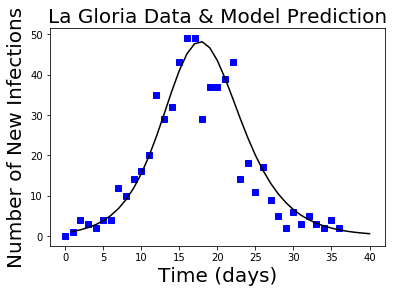

In [6]:
# Edit this code ------ Start ------

# Use the model results to predict the number of
# new cases over 1 day
model_NewCases = []
model_Time = []
for i in range(24,len(time),24):
    model_NewCases.append(0.85 * (S[i-24] - S[i]))
    model_Time.append(time[i])

# Edit this code ------ End ------



# Plot the La Gloria data and the model predictions
plt.figure(3)
plt.plot(data['Time'], data['NewCases'],  'sb')
plt.plot(model_Time, model_NewCases, '-k')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number of New Infections', fontsize=20)
plt.title('La Gloria Data & Model Prediction', fontsize=20)